In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib notebook

# Study data files
mouse_path = "Resources/mouse.csv"
study_path = "Resources/study.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_path)
study = pd.read_csv(study_path)

# Merge two dataframes using an outer join
merge_df = pd.merge(mouse, study, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
merge_df["Mouse ID"].count()

1893

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_mice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]

#display
dupes_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. delete rows with mouse Id = g989
# Get names of indexes 
indexNames = merge_df[merge_df['Mouse ID'] == 'g989' ].index

# Delete these row indexes from dataFrame
merge_df.drop(indexNames , inplace=True)
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice in the clean DataFrame.
merge_df["Mouse ID"].count()

1880

In [24]:
#checking to see what it looks like
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#find the names of drugs to check
drugs = merge_df["Drug Regimen"].unique()
drugs

#assign variable to each formula to call on later in summary table
#ramicane = purchase_data_renamed_df.groupby("Gender")
drug_mean = merge_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_mean

drug_median = merge_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_median

drug_var = merge_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_var

drug_std = merge_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_std

drug_sem = merge_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_sem

#summary table of all variables
summary_df = pd.DataFrame({"Tumor Volume (mm3) Mean": drug_mean,
                                      "Tumor Volume (mm3) Median": drug_median,
                                      "Tumor Volume (mm3) Variance": drug_var,
                                      "Tumor Volume (mm3) Standard Deviation": drug_std,
                                      "Tumor Volume (mm3) Standard Error of Mean": drug_sem})
summary_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<IPython.core.display.Javascript object>


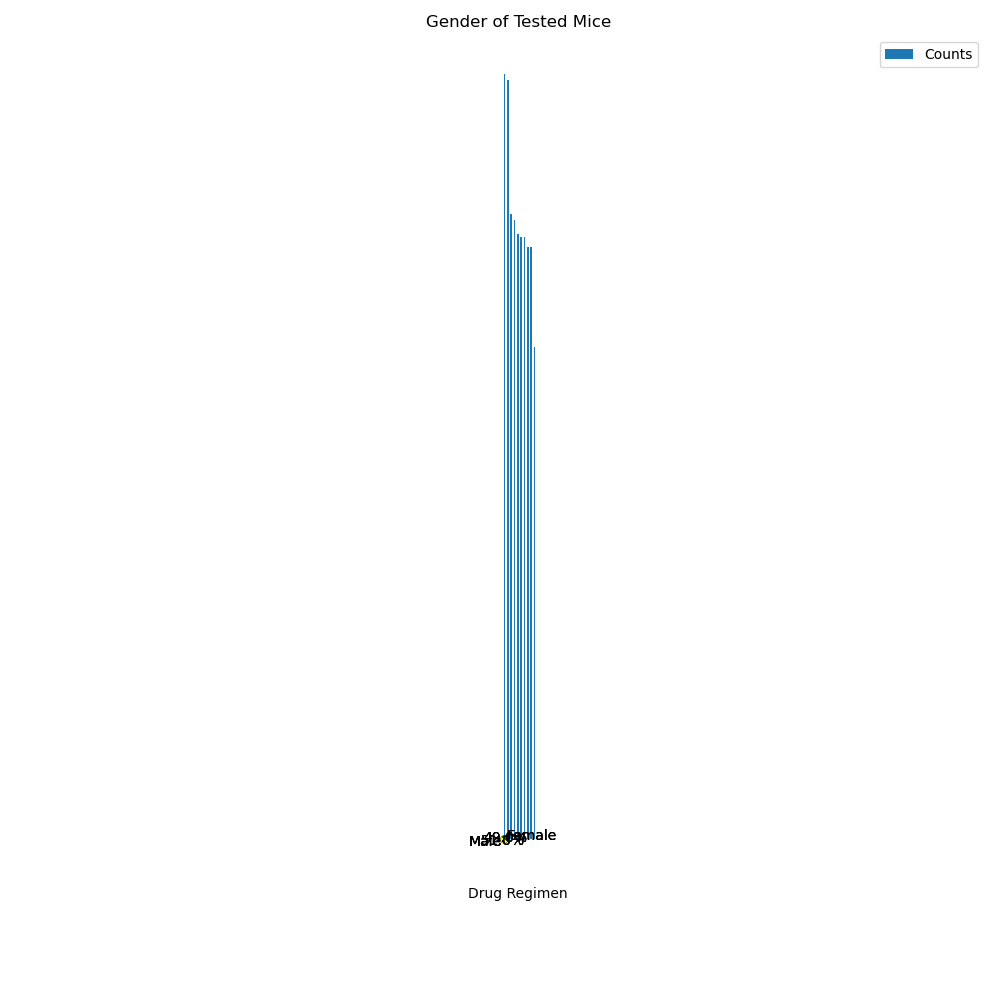

In [27]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#PANDAS
#create new data frame
drug_regimen = merge_df["Drug Regimen"].value_counts()
pandas_bar_df = pd.DataFrame({"Drug Regimen": drugs,
                                      "Counts": drug_regimen})


# Filter the DataFrame down only to those columns to chart
#drugs_timepoints = merge_df["Drug Regimen"]

# Set the index to be "Drug Regimen" so they will be used as labels
pandas_bar_df = pandas_bar_df.set_index("Drug Regimen")
pandas_bar_df

# Use DataFrame.plot() in order to create a bar chart of the data
pandas_bar_df.plot(kind="bar", figsize=(10,10))

# Set a title for the chart
plt.title("Total Number of Timepoints for all Mice Tested")

plt.show()
plt.tight_layout()

#drug_regimen = merge_df["Drug Regimen"].value_counts()


#plt.bar(drug_regimen.index.values, drug_regimen.values, color="b", align="center")



<IPython.core.display.Javascript object>


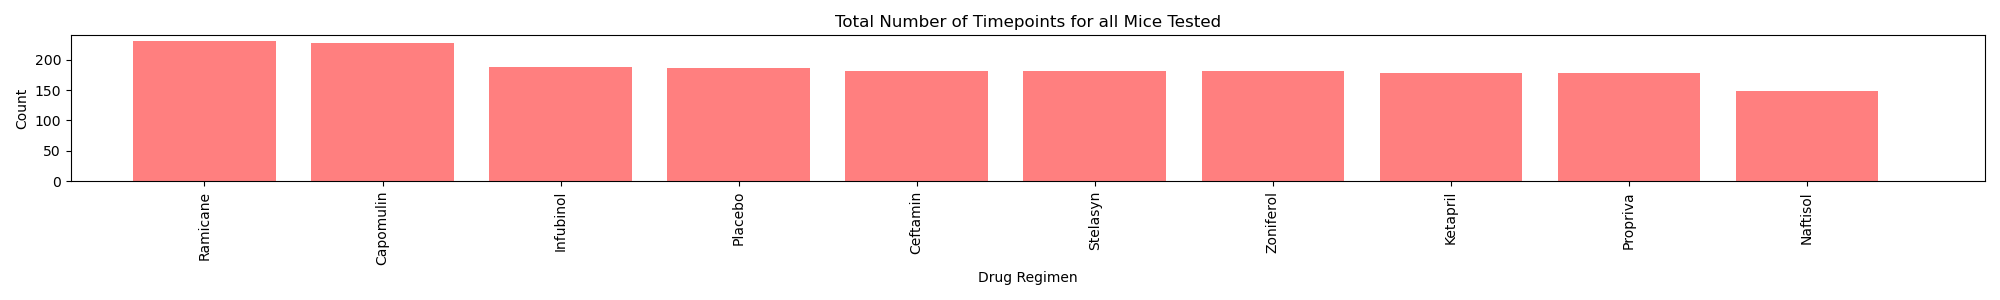

In [28]:
#MATPLOTLIB
#create new data frame
drug_regimen_matplotlib = merge_df["Drug Regimen"].value_counts()
matplotlib_bar_df = pd.DataFrame({"Drug Regimen": drugs,
                                      "Counts": drug_regimen_matplotlib})
# Set x axis and tick locations
x_axis = np.arange(len(matplotlib_bar_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, matplotlib_bar_df["Counts"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, matplotlib_bar_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(matplotlib_bar_df["Counts"])+10)

 # Set a Title and labels
plt.title("Total Number of Timepoints for all Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

 #show the graph
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


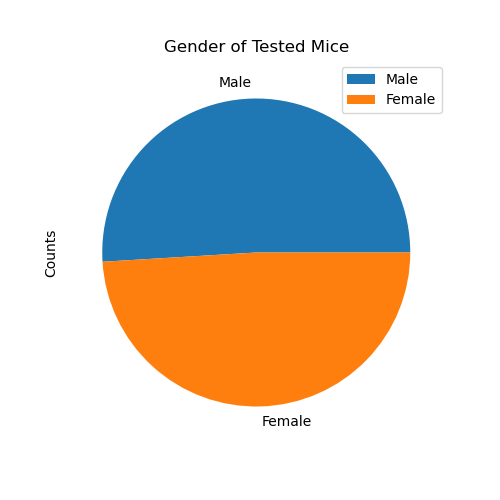

Text(0.5, 1.0, 'Gender of Tested Mice')

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#create a new data frame
gender_pandas = merge_df["Sex"].unique()
gender_count_pandas = merge_df["Sex"].value_counts()
gender_pandas_df = pd.DataFrame({"Gender": gender_pandas,
                                    "Counts": gender_count_pandas})
index = merge_df["Sex"].unique()
#plt.title("Gender of Tested Mice")
plot = gender_pandas_df.plot.pie(y='Counts', figsize=(5,5))
plt.title("Gender of Tested Mice")

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = merge_df["Sex"].unique()
gender_count = merge_df["Sex"].value_counts()
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_count, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Set title
plt.title("Gender of Tested Mice")

# Save an image of our chart and print the final product to the screen
plt.show()

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint_mice_df = merge_df.drop_duplicates(
  subset = ['Mouse ID'],
  keep = 'last').reset_index(drop = True)
timepoint_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
best_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in best_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #if drug regimen equals drug then give tumor volume
    best_drugs1 = timepoint_mice_df.loc[timepoint_mice_df["Drug Regimen"] == i, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor.append(best_drugs1)
    
    # Determine outliers using upper and lower bounds
    quartiles = best_drugs1.quantile([.25,.5,.75])
    print(quartiles)
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor growth is: {lowerq}")
    print(f"The upper quartile of tumor growth is: {upperq}")
    print(f"The interquartile range of tumor growth is: {iqr}")
    print(f"The the median of tumor growth is: {quartiles.loc[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of tumor growth is: 32.37735684
The upper quartile of tumor growth is: 40.1592203
The interquartile range of tumor growth is: 7.781863460000004
The the median of tumor growth is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of tumor growth is: 31.56046955
The upper quartile of tumor growth is: 40.65900627
The interquartile range of tumor growth is: 9.098536719999998
The the median of tumor growth is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of tumor growth is: 54.04860769
The upper quartile of tumor growth is: 65.52574285
Th

In [36]:
tumor

[1      23.343598
 2      28.484033
 3      28.430964
 6      30.485985
 10     31.023923
 12     31.896238
 13     32.377357
 14     33.329098
 16     34.455298
 20     37.311846
 22     36.041047
 24     37.074024
 28     38.846876
 30     38.939633
 31     38.982878
 32     38.753265
 34     38.125164
 35     39.952347
 36     40.658124
 37     40.159220
 38     40.728578
 39     41.483008
 40     41.581521
 45     47.685963
 180    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 49     67.973419
 50     65.525743
 57

<IPython.core.display.Javascript object>


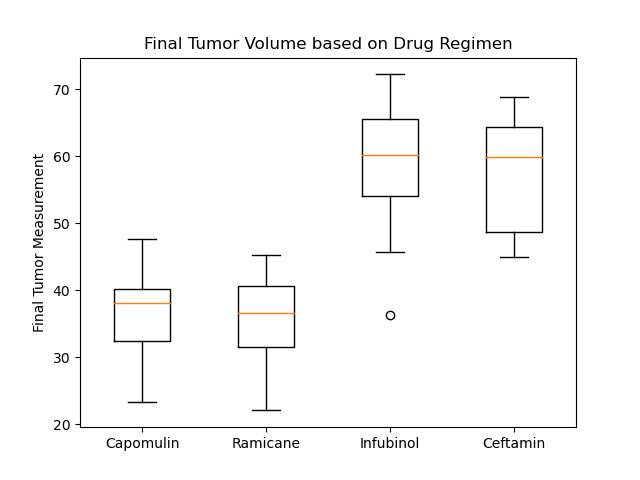

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume based on Drug Regimen')
ax1.set_ylabel('Final Tumor Measurement')
ax1.boxplot(tumor, labels = best_drugs)
plt.show()

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

best_drugs_df = merge_df[ (timepoint_mice_group["Drug Regimen"] == ['Placebo']) 
                                     & (timepoint_mice_group["Drug Regimen"] == ['Ceftamin']) 
                                    & (timepoint_mice_group["Drug Regimen"] == ['Stelasyn'])
                                    & (timepoint_mice_group["Drug Regimen"] == ['Zoniferol'])
                                    & (timepoint_mice_group["Drug Regimen"] == ['Ketapril'])
                                    & (timepoint_mice_group["Drug Regimen"] == ['Propriva'])
                                    & (timepoint_mice_group["Drug Regimen"] == ['Naftisol'])].index
best_drugs_df.drop(indexNames , inplace=True)
best_drugs_df



In [ ]:
timepoint_mice_group = timepoint_mice_df.groupby(["Drug Regimen"])
timepoint_mice_group

drugs
